In [1]:
import pandas as pd
import matplotlib.pyplot as pp
import numpy as np
from IPython.display import display
from matplotlib import cm

In [2]:
#Observation for top10 countries
#Sorting countries by 2014 CO2 emissions in order to pick up top10 countries and create the 'country_name' list
observation = pd.read_csv('CO2.csv', '\t')
observation.sort_values(by='2014',ascending=False).head(50)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
257,World,WLD,CO2 emissions (kt),EN.ATM.CO2E.KT,9.396706e+06,9.434403e+06,9.818840e+06,1.035575e+07,1.094701e+07,1.143344e+07,...,3.118050e+07,3.218159e+07,3.189190e+07,3.347238e+07,3.484750e+07,3.547089e+07,3.583759e+07,3.613828e+07,NaN,NaN
101,IDA & IBRD total,IBT,CO2 emissions (kt),EN.ATM.CO2E.KT,2.646764e+06,2.365642e+06,2.296576e+06,2.373491e+06,2.495120e+06,2.682994e+06,...,1.645411e+07,1.746498e+07,1.784787e+07,1.898414e+07,2.049077e+07,2.120967e+07,2.134006e+07,2.158385e+07,NaN,NaN
138,Low & middle income,LMY,CO2 emissions (kt),EN.ATM.CO2E.KT,2.397118e+06,2.089133e+06,1.998925e+06,2.061471e+06,2.165258e+06,2.348160e+06,...,1.610879e+07,1.712797e+07,1.753204e+07,1.864713e+07,2.012521e+07,2.086111e+07,2.097275e+07,2.123934e+07,NaN,NaN
154,Middle income,MIC,CO2 emissions (kt),EN.ATM.CO2E.KT,2.364024e+06,2.057448e+06,1.968276e+06,2.030026e+06,2.131647e+06,2.309541e+06,...,1.597587e+07,1.698494e+07,1.738720e+07,1.849421e+07,1.997811e+07,2.071223e+07,2.082404e+07,2.107491e+07,NaN,NaN
100,IBRD only,IBD,CO2 emissions (kt),EN.ATM.CO2E.KT,2.555413e+06,2.274910e+06,2.200312e+06,2.271036e+06,2.382618e+06,2.555903e+06,...,1.575182e+07,1.674915e+07,1.716175e+07,1.825830e+07,1.972866e+07,2.044014e+07,2.054596e+07,2.078453e+07,NaN,NaN
247,Upper middle income,UMC,CO2 emissions (kt),EN.ATM.CO2E.KT,1.996279e+06,1.666491e+06,1.548540e+06,1.579262e+06,1.662870e+06,1.795282e+06,...,1.269459e+07,1.347116e+07,1.373474e+07,1.478124e+07,1.593065e+07,1.642638e+07,1.667633e+07,1.676815e+07,NaN,NaN
140,Late-demographic dividend,LTE,CO2 emissions (kt),EN.ATM.CO2E.KT,1.973603e+06,1.625552e+06,1.497660e+06,1.540508e+06,1.603896e+06,1.712471e+06,...,1.126732e+07,1.195861e+07,1.221143e+07,1.326421e+07,1.439166e+07,1.481278e+07,1.505346e+07,1.508966e+07,NaN,NaN
61,East Asia & Pacific,EAS,CO2 emissions (kt),EN.ATM.CO2E.KT,1.210072e+06,1.041181e+06,9.485552e+05,9.917946e+05,1.046002e+06,1.134631e+06,...,1.063488e+07,1.122486e+07,1.163108e+07,1.258472e+07,1.375383e+07,1.410949e+07,1.425814e+07,1.427211e+07,NaN,NaN
93,High income,HIC,CO2 emissions (kt),EN.ATM.CO2E.KT,5.704454e+06,5.829209e+06,6.100320e+06,6.442752e+06,6.771366e+06,7.070173e+06,...,1.372239e+07,1.355349e+07,1.284133e+07,1.329178e+07,1.306406e+07,1.293761e+07,1.291932e+07,1.291407e+07,NaN,NaN
179,OECD members,OED,CO2 emissions (kt),EN.ATM.CO2E.KT,5.736533e+06,5.854901e+06,6.115154e+06,6.454151e+06,6.778392e+06,7.067273e+06,...,1.328131e+07,1.304799e+07,1.225743e+07,1.263803e+07,1.245858e+07,1.227146e+07,1.225921e+07,1.213827e+07,NaN,NaN


In [3]:
#read data from original csv files
CO2 = pd.read_csv('CO2.csv', '\t')
Population = pd.read_csv('Population.csv', '\t')
GDP = pd.read_csv('GDP.csv', '\t')

#need to drop the useless columns
#create 'drop_year' list
drop_year= []
for year in range(1960,2010):
    year=str(year)
    drop_year.append(year)
#also need to drop 2015 and 2016 since the latest data stop at 2014
drop_year.append('2015')    
drop_year.append('2016')

drop_col_name=['Country Code','Indicator Name','Indicator Code']

#create the 'country_name' list which contains the top10 countries for selection
country_name=['China','United States','India','Russian Federation','Japan',
         'Germany','Iran, Islamic Rep.','Saudi Arabia','Korea, Rep.','Canada']

#function for drop countries
def drop_country(df,i=0):
    for country in df['Country Name']:
        country=str(country)
        if country not in country_name:
            df=df.drop(i,axis=0)
            i+=1
        else:
            i+=1
    return df

#function for set the order index start from 1 instead of 0
#also sort the data by input column name
def order_set(df,ascending_column):
    df=df.sort_values(by=ascending_column,ascending=False)
    df = df.reset_index()
    df.index = df.index + 1
    df=df.drop('index', axis=1)
    return df

#function for format the original data frame by calling those previous functions
def format_df(df):
    df=df.drop(drop_year,axis=1)
    df=df.drop(drop_col_name,axis=1)
    df=drop_country(df)
    df=order_set(df,'Country Name')
    return df

CO2=format_df(CO2)
Population=format_df(Population)
GDP=format_df(GDP)

In [4]:
#view the CO2 data
CO2

,Country Name,2010,2011,2012,2013,2014
1,United States,5395532.125,5289680.503,5.119436e+06,5.159161e+06,5.254279e+06
2,Saudi Arabia,518491.798,499878.106,5.648427e+05,5.410475e+05,6.010470e+05
3,Russian Federation,1670531.186,1763405.295,1.830830e+06,1.778561e+06,1.705346e+06
4,"Korea, Rep.",566716.515,589400.577,5.839661e+05,5.924992e+05,5.871564e+05
5,Japan,1171624.835,1191074.603,1.230168e+06,1.246516e+06,1.214048e+06
6,"Iran, Islamic Rep.",573031.089,589055.879,6.117583e+05,6.197780e+05,6.494807e+05
7,India,1719690.988,1841776.419,2.018504e+06,2.034752e+06,2.238377e+06
8,Germany,758859.981,732497.918,7.398613e+05,7.573125e+05,7.198834e+05
9,China,8776040.416,9733538.120,1.002857e+07,1.025801e+07,1.029193e+07
10,Canada,534670.602,537112.824,5.174577e+05,5.171607e+05,5.371935e+05


In [5]:
#view the population data
Population

,Country Name,2010,2011,2012,2013,2014
1,United States,3.093482e+08,3.116634e+08,3.139984e+08,3.162049e+08,3.185635e+08
2,Saudi Arabia,2.742568e+07,2.823802e+07,2.908636e+07,2.994448e+07,3.077672e+07
3,Russian Federation,1.428494e+08,1.429609e+08,1.432017e+08,1.435069e+08,1.438197e+08
4,"Korea, Rep.",4.955411e+07,4.993664e+07,5.019985e+07,5.042889e+07,5.074666e+07
5,Japan,1.280700e+08,1.278330e+08,1.276290e+08,1.274450e+08,1.272760e+08
6,"Iran, Islamic Rep.",7.456751e+07,7.549158e+07,7.645357e+07,7.743538e+07,7.841109e+07
7,India,1.230981e+09,1.247236e+09,1.263066e+09,1.278562e+09,1.293859e+09
8,Germany,8.177693e+07,8.027498e+07,8.042582e+07,8.064560e+07,8.098250e+07
9,China,1.337705e+09,1.344130e+09,1.350695e+09,1.357380e+09,1.364270e+09
10,Canada,3.400527e+07,3.434278e+07,3.475054e+07,3.515545e+07,3.554456e+07


In [6]:
#sorting the CO2 emissions of 2014
CO2_2014=order_set(CO2,'2014')
CO2_2014

,Country Name,2010,2011,2012,2013,2014
1,China,8776040.416,9733538.120,1.002857e+07,1.025801e+07,1.029193e+07
2,United States,5395532.125,5289680.503,5.119436e+06,5.159161e+06,5.254279e+06
3,India,1719690.988,1841776.419,2.018504e+06,2.034752e+06,2.238377e+06
4,Russian Federation,1670531.186,1763405.295,1.830830e+06,1.778561e+06,1.705346e+06
5,Japan,1171624.835,1191074.603,1.230168e+06,1.246516e+06,1.214048e+06
6,Germany,758859.981,732497.918,7.398613e+05,7.573125e+05,7.198834e+05
7,"Iran, Islamic Rep.",573031.089,589055.879,6.117583e+05,6.197780e+05,6.494807e+05
8,Saudi Arabia,518491.798,499878.106,5.648427e+05,5.410475e+05,6.010470e+05
9,"Korea, Rep.",566716.515,589400.577,5.839661e+05,5.924992e+05,5.871564e+05
10,Canada,534670.602,537112.824,5.174577e+05,5.171607e+05,5.371935e+05


In [7]:
#define a function for line plot
def plotcountry(df,Country):
    df=df.set_index(['Country Name'])
    data = df.loc[Country]
    pp.plot(data.index,data.values)

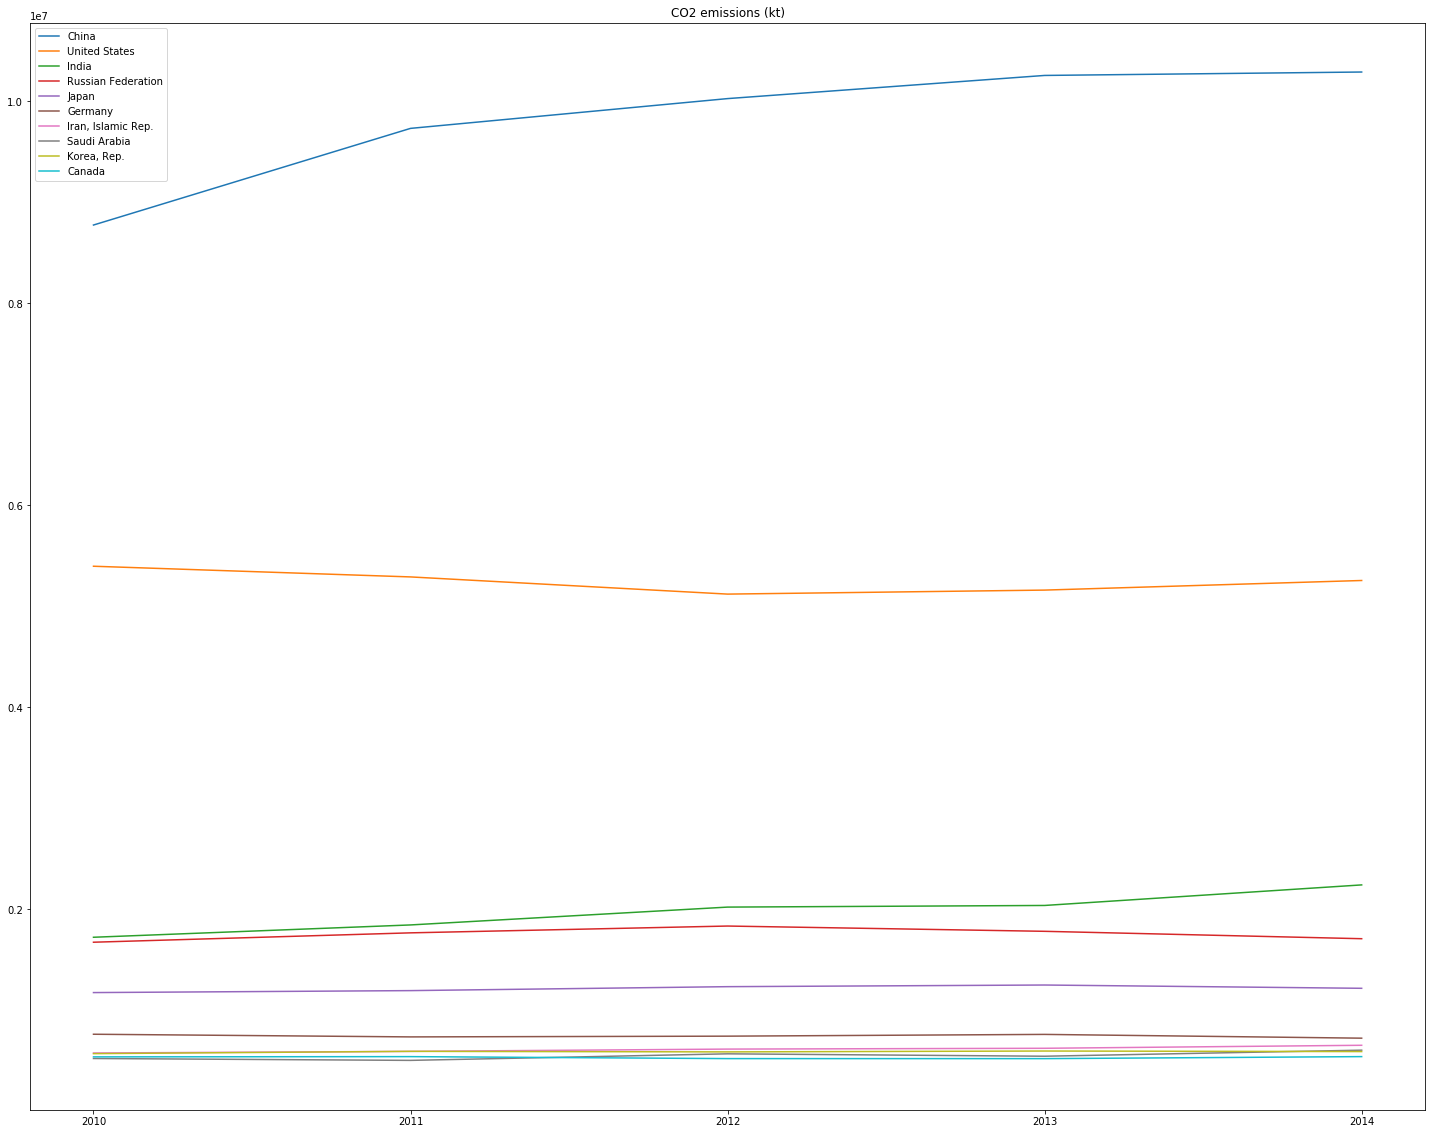

In [8]:
#draw the CO2 emissions line plot by function and for loop
pp.figure(figsize=(25,20))
for country in country_name:
    plotcountry(CO2,country)
pp.legend(country_name)
pp.title('CO2 emissions (kt)')
pp.show()

In [9]:
#generate CO2 emissions per person data frame
years=['2010','2011','2012','2013','2014']
CO2per_person=CO2.drop(years,axis=1)

def generate_CO2per_person(df=CO2per_person):
    for year in years:
        df[str(year)]=CO2[str(year)]/Population[str(year)]
    return df

generate_CO2per_person()

#sorting the CO2 emissions per person data by value of 2014
CO2per_person_2014=order_set(CO2per_person,'2014')
CO2per_person_2014

,Country Name,2010,2011,2012,2013,2014
1,Saudi Arabia,0.018905,0.017702,0.019420,0.018068,0.019529
2,United States,0.017442,0.016972,0.016304,0.016316,0.016494
3,Canada,0.015723,0.015640,0.014891,0.014711,0.015113
4,Russian Federation,0.011694,0.012335,0.012785,0.012394,0.011858
5,"Korea, Rep.",0.011436,0.011803,0.011633,0.011749,0.011570
6,Japan,0.009148,0.009317,0.009639,0.009781,0.009539
7,Germany,0.009280,0.009125,0.009199,0.009391,0.008889
8,"Iran, Islamic Rep.",0.007685,0.007803,0.008002,0.008004,0.008283
9,China,0.006561,0.007242,0.007425,0.007557,0.007544
10,India,0.001397,0.001477,0.001598,0.001591,0.001730


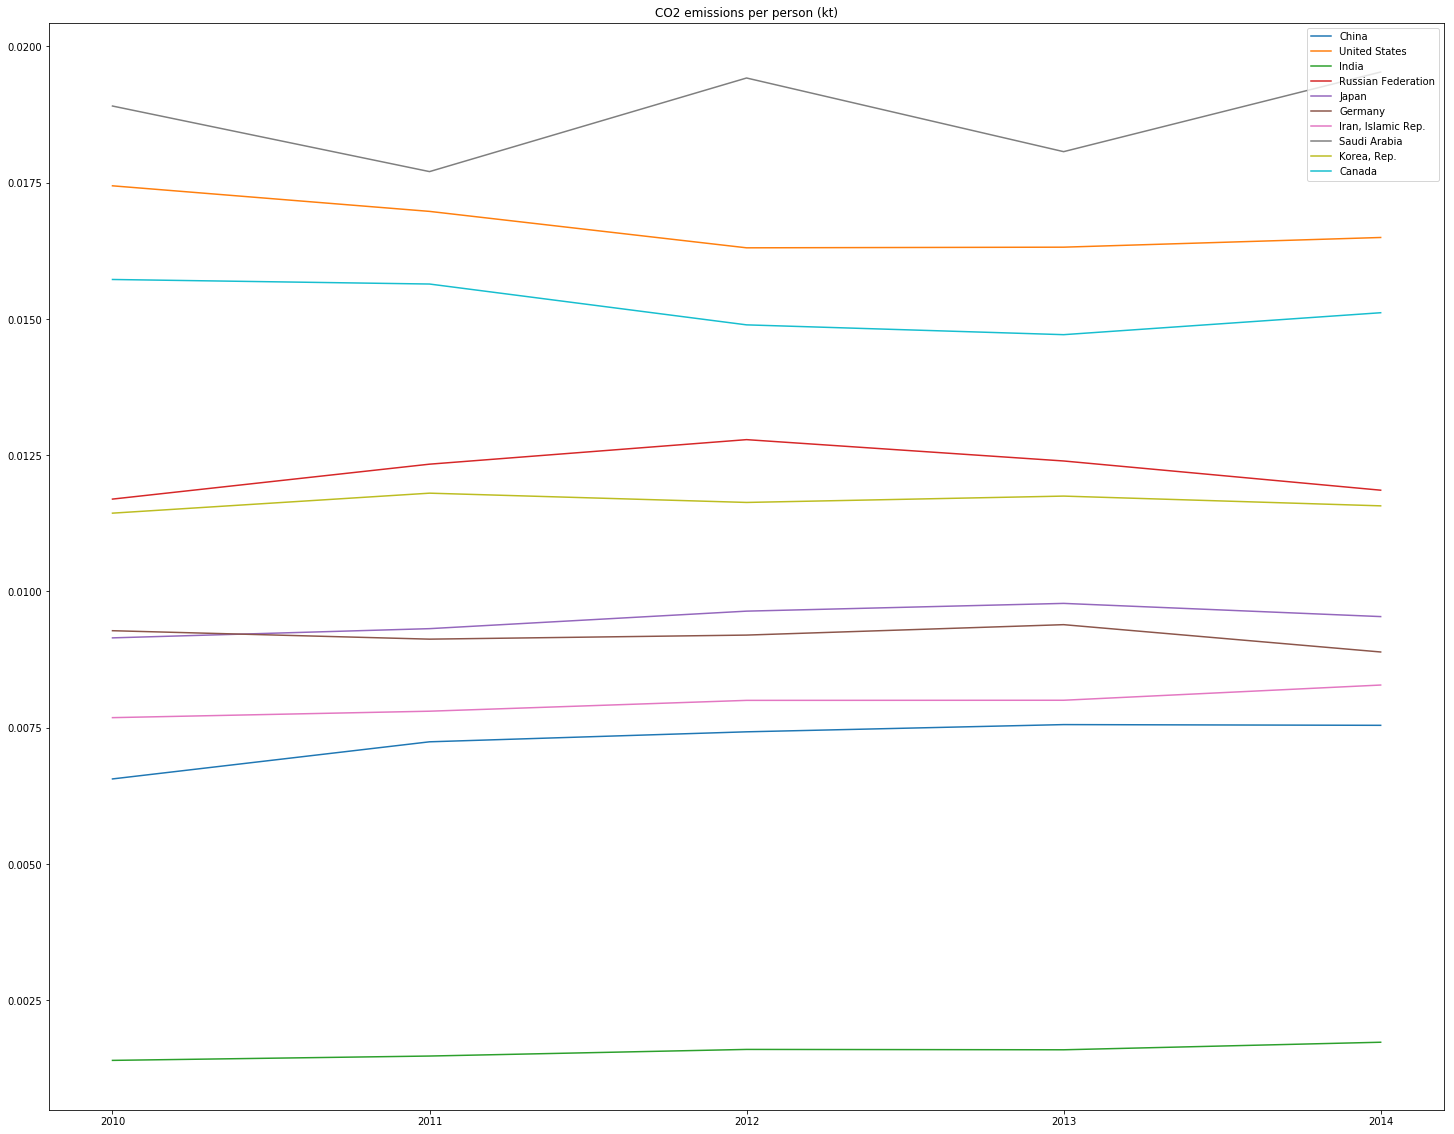

In [10]:
#draw the CO2 emissions per person line plot by function and for loop
pp.figure(figsize=(25,20))
for country in country_name:
    plotcountry(CO2per_person,country)
pp.legend(country_name)
pp.title('CO2 emissions per person (kt)')
pp.show()

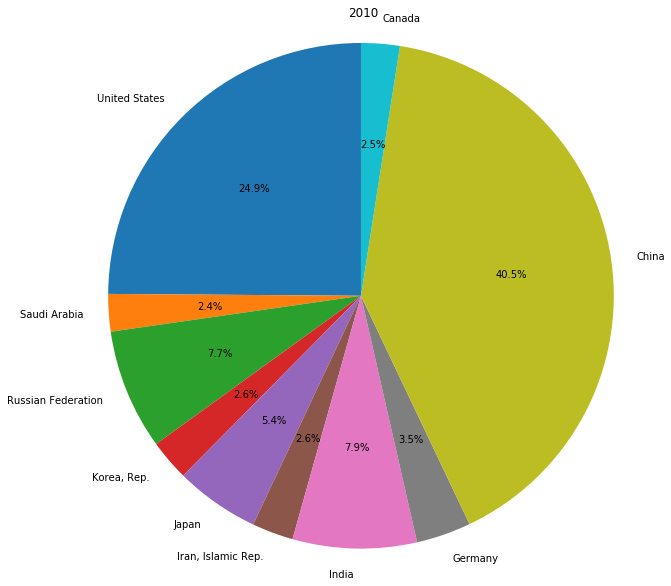

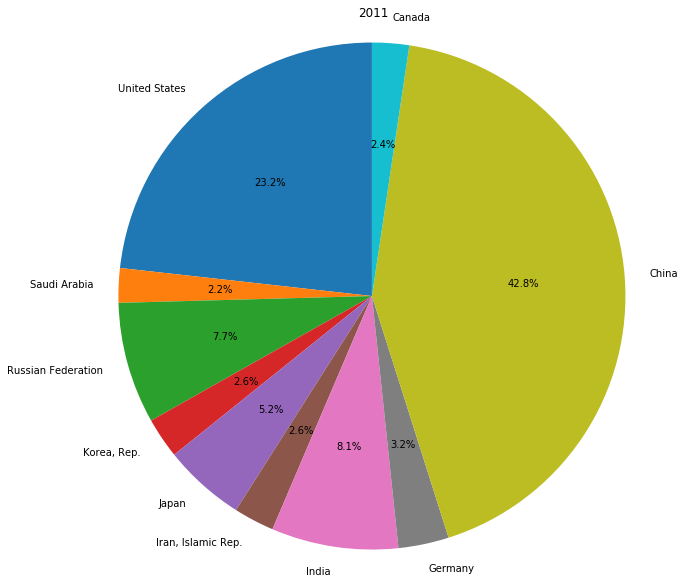

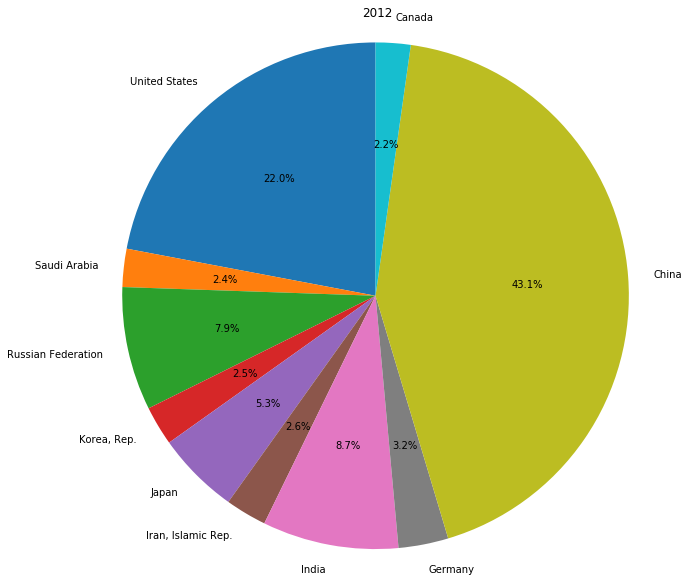

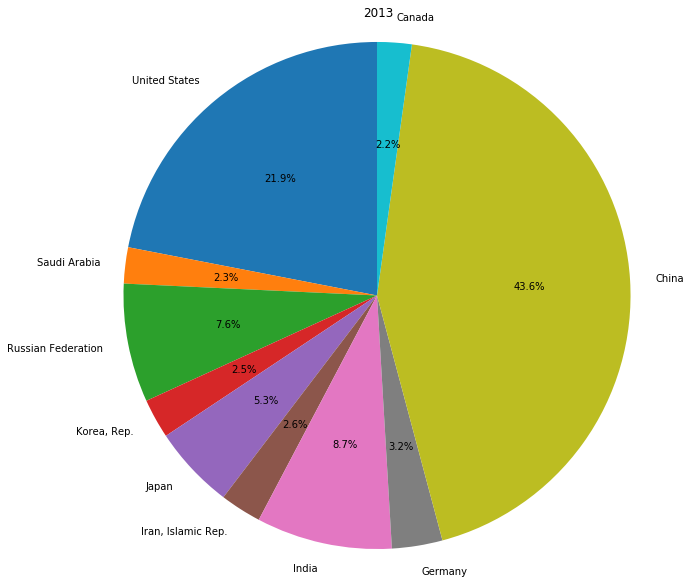

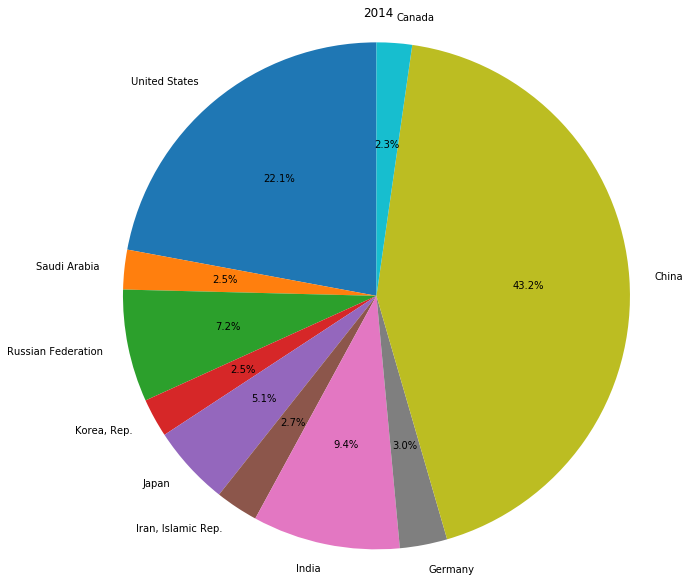

In [11]:
#Compare the data to the overall CO2 emissions of the all 10 countries 
#define the function for pie plot
def pieplot_all_years(df=CO2):
    for year in years:
        pp.figure(figsize=(8,8))
        pp.pie(df[str(year)], labels=CO2['Country Name'], shadow=False, 
               startangle=90, autopct='%1.1f%%')
        pp.axis('equal')
        pp.tight_layout()
        pp.title(str(year))
        pp.show()
        
pieplot_all_years()

In [12]:
#Calculate the fixed value growth of CO2 emissions between years
def growvalue(df,df_rate):
    for year in range(2011,2015):
        df_rate[str(year)]=(df[str(year)]-df[str(year-1)])
    return df_rate

CO2_growth=CO2.drop(years,axis=1)
CO2_valuegrowth=growvalue(CO2,CO2_growth)

#sorting the fixed value growth of CO2 emissions by value of 2014
CO2_valuegrowth_2014=order_set(CO2_valuegrowth,'2014')
CO2_valuegrowth_2014

,Country Name,2011,2012,2013,2014
1,India,122085.431,176727.398,16248.477,203624.843
2,United States,-105851.622,-170244.142,39724.611,95118.313
3,Saudi Arabia,-18613.692,64964.572,-23795.163,59999.454
4,China,957497.704,295035.820,229433.190,33919.750
5,"Iran, Islamic Rep.",16024.790,22702.397,8019.729,29702.700
6,Canada,2442.222,-19655.120,-297.027,20032.821
7,"Korea, Rep.",22684.062,-5434.494,8533.109,-5342.819
8,Japan,19449.768,39093.887,16347.486,-32467.618
9,Germany,-26362.063,7363.336,17451.253,-37429.069
10,Russian Federation,92874.109,67425.129,-52269.418,-73215.322


In [13]:
#define a founction to calculate growing rate
def grow_rate_ave(df,df_rate):
    df_rate['Rate Sum']=0
    for year in range(2010,2014):
        df_rate['Rate Sum']+=(df[str(year+1)]-df[str(year)])/df[str(year)]*100
    df_rate['Average Growing Rate (%)']=df_rate['Rate Sum']/4
    return df_rate

def grow_rate_year(df,df_rate):
    for year in range(2011,2015):
        df_rate['Growing Rate of {} (%)'.format(str(year))]=(df[str(year)]-df[str(year-1)])/df[str(year-1)]*100
    return df_rate

#generate the CO2 emissions growth rate table
CO2_growthrate=CO2.drop(years,axis=1)
CO2_rate_ave=grow_rate_ave(CO2,CO2_growthrate)
CO2_rate=grow_rate_year(CO2,CO2_rate_ave)
CO2_rate=CO2_rate.drop('Rate Sum',axis=1)
CO2_rate

,Country Name,Average Growing Rate (%),Growing Rate of 2011 (%),Growing Rate of 2012 (%),Growing Rate of 2013 (%),Growing Rate of 2014 (%)
1,United States,-0.640156,-1.961838,-3.218420,0.775957,1.843678
2,Saudi Arabia,4.070727,-3.589968,12.996083,-4.212706,11.089498
3,Russian Federation,0.602906,5.559556,3.823575,-2.854957,-4.116548
4,"Korea, Rep.",0.910043,4.002718,-0.922037,1.461234,-0.901743
5,Japan,0.916629,1.660068,3.282237,1.328882,-2.604669
6,"Iran, Islamic Rep.",3.188483,2.796496,3.854031,1.310931,4.792474
7,India,6.876770,7.099266,9.595486,0.804976,10.007353
8,Germany,-1.263075,-3.473903,1.005236,2.358720,-4.942355
9,China,4.139987,10.910361,3.031126,2.287795,0.330666
10,Canada,0.153396,0.456771,-3.659402,-0.057401,3.873616


In [14]:
#Sorting the CO2 emission growth rate by value of 2014
CO2_rate_2014=order_set(CO2_rate,'Growing Rate of 2014 (%)')
CO2_rate_2014

,Country Name,Average Growing Rate (%),Growing Rate of 2011 (%),Growing Rate of 2012 (%),Growing Rate of 2013 (%),Growing Rate of 2014 (%)
1,Saudi Arabia,4.070727,-3.589968,12.996083,-4.212706,11.089498
2,India,6.876770,7.099266,9.595486,0.804976,10.007353
3,"Iran, Islamic Rep.",3.188483,2.796496,3.854031,1.310931,4.792474
4,Canada,0.153396,0.456771,-3.659402,-0.057401,3.873616
5,United States,-0.640156,-1.961838,-3.218420,0.775957,1.843678
6,China,4.139987,10.910361,3.031126,2.287795,0.330666
7,"Korea, Rep.",0.910043,4.002718,-0.922037,1.461234,-0.901743
8,Japan,0.916629,1.660068,3.282237,1.328882,-2.604669
9,Russian Federation,0.602906,5.559556,3.823575,-2.854957,-4.116548
10,Germany,-1.263075,-3.473903,1.005236,2.358720,-4.942355


In [15]:
#Sorting the CO2 emission growth rate by value of average growth rate
CO2_rate_average=order_set(CO2_rate,'Average Growing Rate (%)')
CO2_rate_average

,Country Name,Average Growing Rate (%),Growing Rate of 2011 (%),Growing Rate of 2012 (%),Growing Rate of 2013 (%),Growing Rate of 2014 (%)
1,India,6.876770,7.099266,9.595486,0.804976,10.007353
2,China,4.139987,10.910361,3.031126,2.287795,0.330666
3,Saudi Arabia,4.070727,-3.589968,12.996083,-4.212706,11.089498
4,"Iran, Islamic Rep.",3.188483,2.796496,3.854031,1.310931,4.792474
5,Japan,0.916629,1.660068,3.282237,1.328882,-2.604669
6,"Korea, Rep.",0.910043,4.002718,-0.922037,1.461234,-0.901743
7,Russian Federation,0.602906,5.559556,3.823575,-2.854957,-4.116548
8,Canada,0.153396,0.456771,-3.659402,-0.057401,3.873616
9,United States,-0.640156,-1.961838,-3.218420,0.775957,1.843678
10,Germany,-1.263075,-3.473903,1.005236,2.358720,-4.942355


In [16]:
#define a function for growth rate bar plot
def barplot_average_rate(df,column,colorname,ylabel):
    pp.figure(figsize=(10,15))
    df= df.sort_values(by=column, ascending=True)
    df=df.set_index(['Country Name'])
    data=df[column]
    ax=data.plot(kind='bar',color=colorname,sort_columns=True)
    ax.set_xlabel('Country')
    ax.set_ylabel(ylabel)
    pp.show()

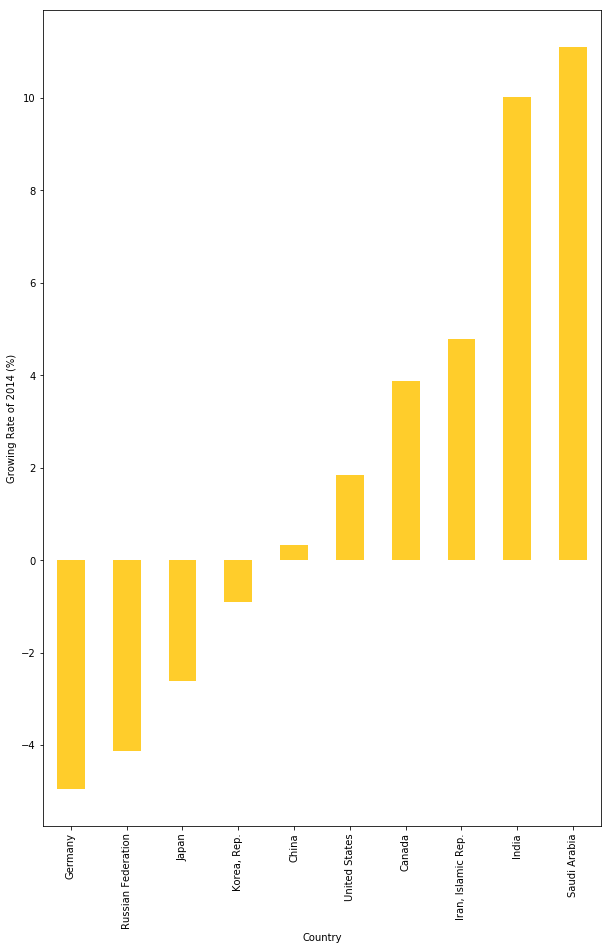

In [17]:
#bar plot of growing rate in CO2 emission for 2014
barplot_average_rate(CO2_rate,'Growing Rate of 2014 (%)','#ffcd2b','Growing Rate of 2014 (%)')

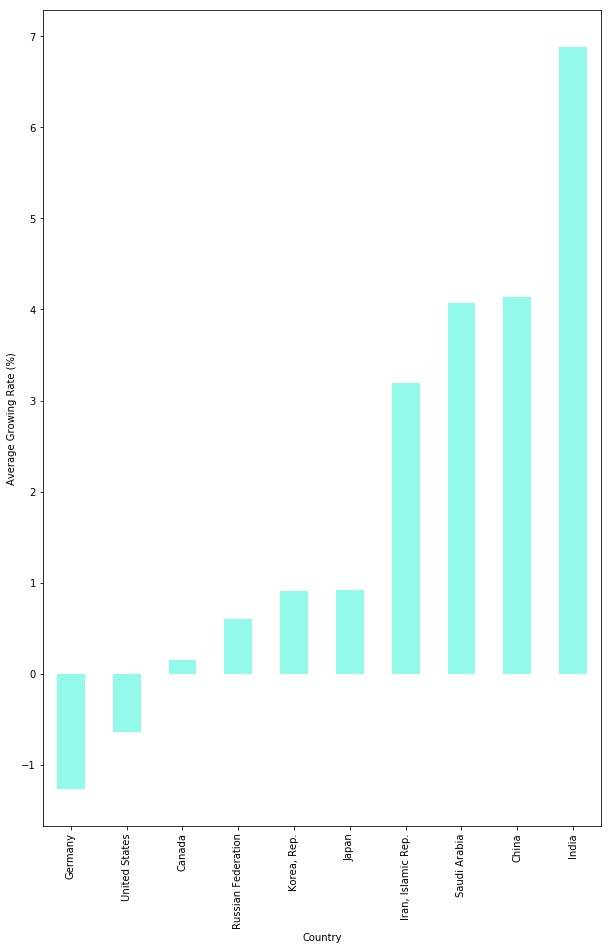

In [18]:
#bar plot of growing rate in CO2 emission for average
barplot_average_rate(CO2_rate,'Average Growing Rate (%)','#93f9ea','Average Growing Rate (%)')

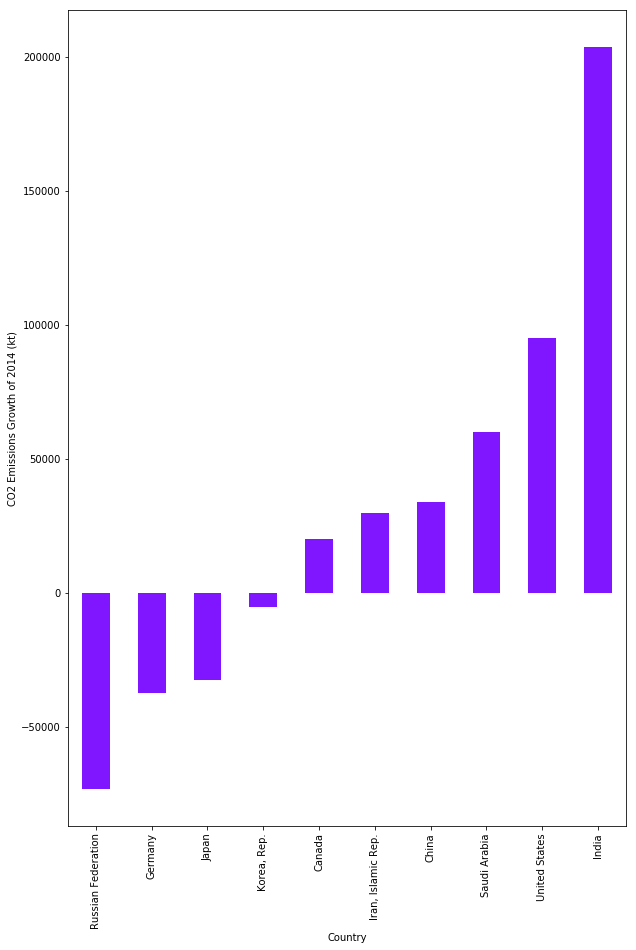

In [19]:
#bar plot of fixed value growth in CO2 emission for 2014
barplot_average_rate(CO2_valuegrowth,'2014','#7f16ff','CO2 Emissions Growth of 2014 (kt)')

In [20]:
#function for draw the regression plot
def draw_reg(country):
    CO2_df = pd.read_csv('CO2.csv', '\t')
    GDP_df = pd.read_csv('GDP.csv', '\t')

    #contain data from 1960-2014, only drop 2015 and 2016
    drop_year= []
    drop_year.append('2015')
    drop_year.append('2016')
    drop_col_name=['Country Code','Indicator Name','Indicator Code']
    country_name=str(country)
    def drop_country(df,i=0):
        for country in df['Country Name']:
            country=str(country)
            if country != country_name:
                df=df.drop(i,axis=0)
                i+=1
            else:
                i+=1
        return df

    def format_df(df):
        df=df.drop(drop_year,axis=1)
        df=df.drop(drop_col_name,axis=1)
        df=drop_country(df,0)
        return df

    CO2_df=format_df(CO2_df)
    GDP_df=format_df(GDP_df)
    
    #join a new dataframe only contain the contry's CO2 and GDP
    aa=CO2_df.set_index(['Country Name']).transpose()
    aa.columns = ['CO2']
    bb=GDP_df.set_index(['Country Name']).transpose()
    bb.columns = ['GDP of '+country_name]
    reg_df=bb.join(aa)
    
    #abstract the CO2 and GDP to x and y as list
    pp.figure(figsize=(15,10))
    x = reg_df["CO2"].values
    y = reg_df["GDP of "+country_name].values

    pp.scatter(x, y)
    
    #draw the best fit line
    m,b = np.polyfit(x, y, 1)
    fit = np.polyfit(x, y, 1)
    fit_fn = np.poly1d(fit) 
    pp.plot(x, y, 'yo', x, fit_fn(x), '--k')
    pp.title('linear regression -- '+country_name)
    pp.xlabel('CO2 (kt)')
    pp.ylabel('GDP in USD')
    pp.legend()
    pp.show()

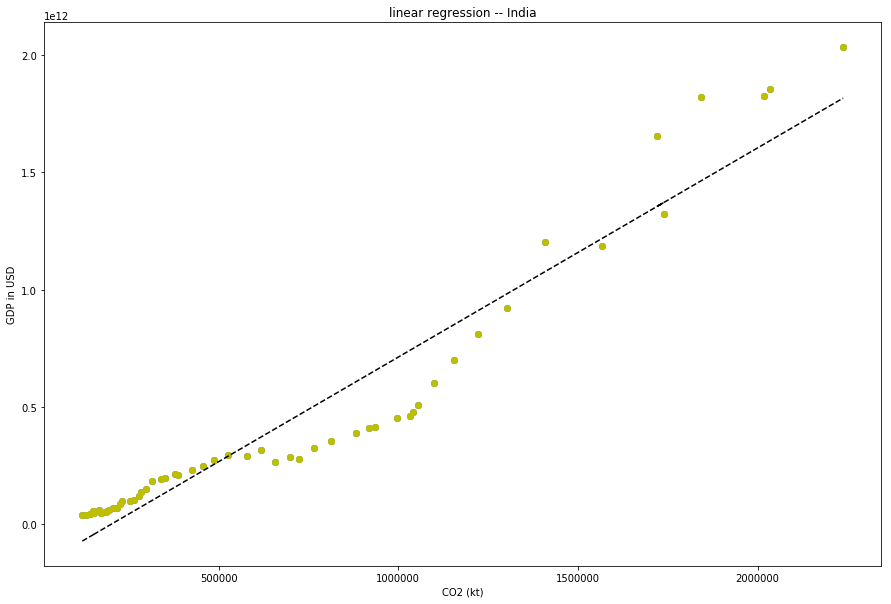

In [21]:
#draw the best fit line and scatter plot for Inida
draw_reg('India')

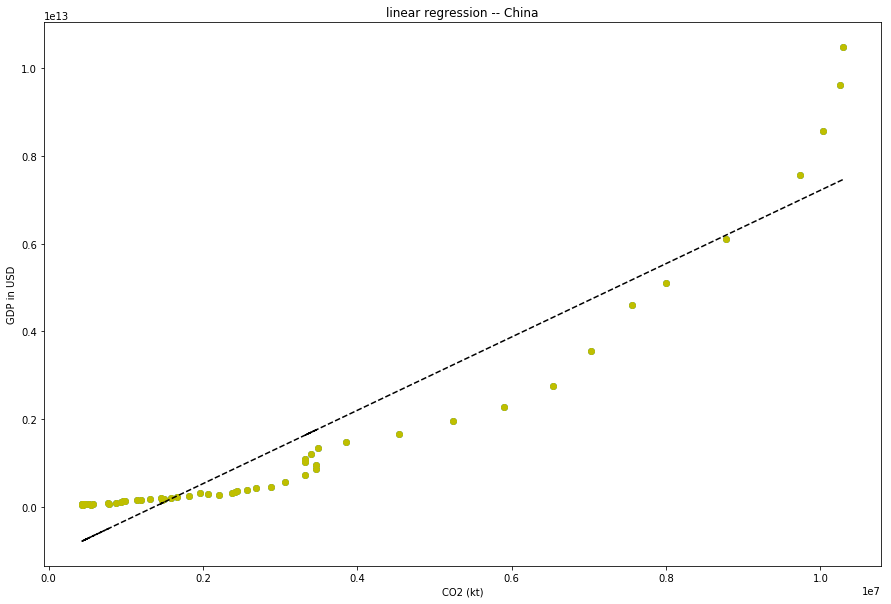

In [22]:
#draw the best fit line and scatter plot for China
draw_reg('China')

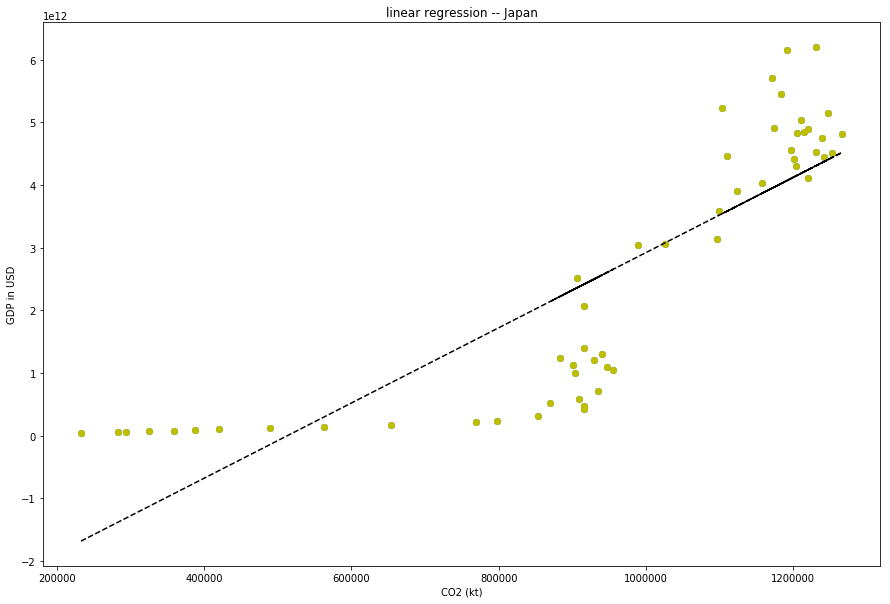

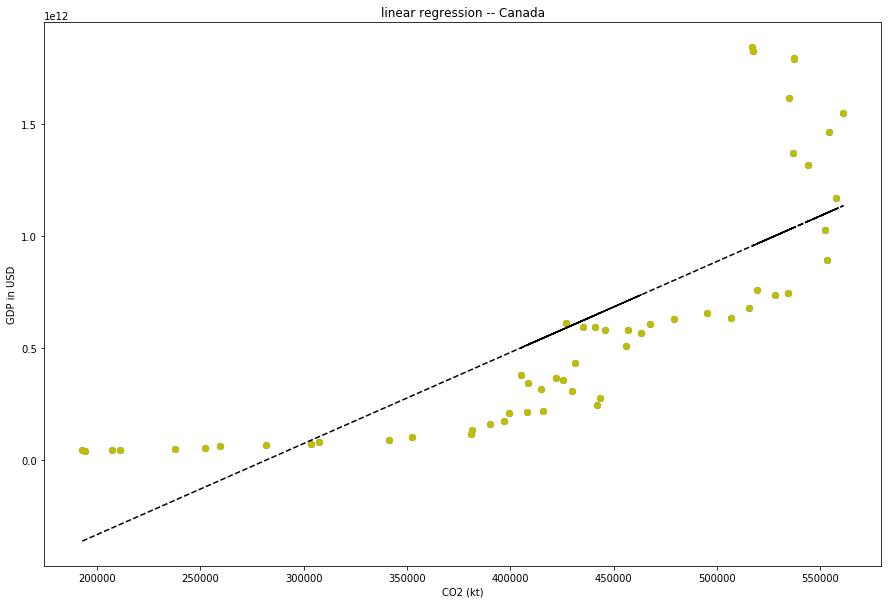

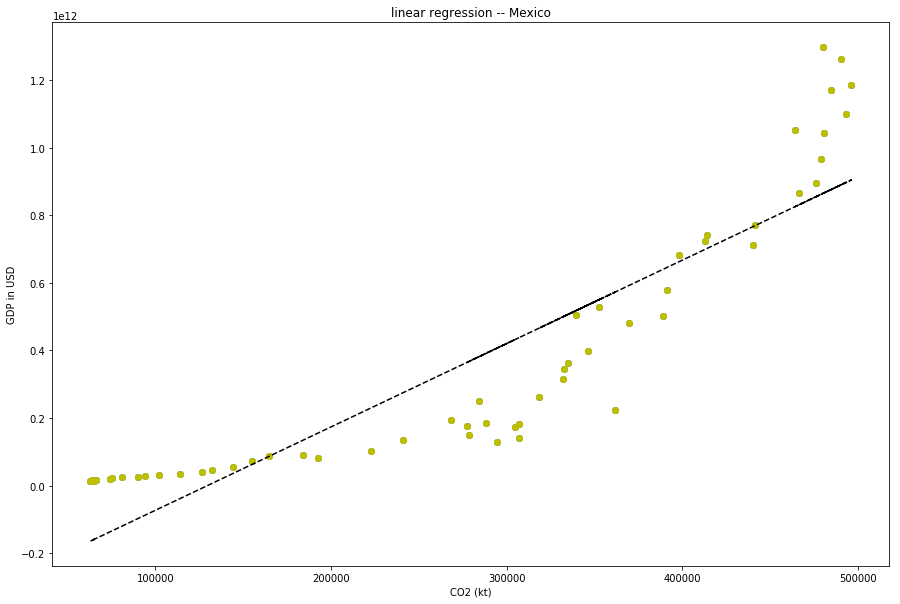

In [23]:
#replace the country input for other country
draw_reg('Japan')
draw_reg('Canada')
draw_reg('Mexico')